<a href="https://colab.research.google.com/github/Kalisa21/legalEase/blob/main/legalEase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
================================================================================
LEGAL CHATBOT PROJECT - PART 1: SETUP & DATA EXPLORATION
================================================================================

Copy-paste this into Google Colab and run cell by cell.
Upload your 'law Sheet1.csv' file when prompted.

Author: Legal Chatbot Project
Dataset: Rwandan Penal Code (304 rows, ~101 articles)
================================================================================
"""

In [ ]:
# ============================================================================
# CELL 1: Install Required Packages (NO VERSION NUMBERS)
# ============================================================================
print("📦 Installing required packages...")
print("This may take 2-3 minutes...\n")

!pip install -q transformers
!pip install -q torch
!pip install -q sentence-transformers
!pip install -q faiss-cpu
!pip install -q datasets
!pip install -q pandas
!pip install -q numpy
!pip install -q scikit-learn
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q wordcloud
!pip install -q tqdm

print("✅ All packages installed successfully!")

📦 Installing required packages...
This may take 2-3 minutes...

✅ All packages installed successfully!


In [ ]:
# CELL 2: Import Libraries
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import json
from collections import Counter
from typing import List, Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [ ]:
# CELL 3: Upload and Load Dataset
# ============================================================================
print("📂 Please upload your 'law Sheet1.csv' file...")
print("Click the folder icon on the left sidebar, then upload.")
print("After upload, run this cell.\n")

from google.colab import files

# Load the dataset
df = pd.read_csv('/content/law - Sheet1.csv')

print("\n✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 Columns: {list(df.columns)}")


📂 Please upload your 'law Sheet1.csv' file...
Click the folder icon on the left sidebar, then upload.
After upload, run this cell.


✅ Dataset loaded successfully!

📊 Dataset Shape: 304 rows × 5 columns

📋 Columns: ['id', 'article_label', 'article_text', 'keywords_synonyms', 'language']


In [ ]:
# CELL 4: Initial Data Exploration
# ============================================================================
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

# Basic info
print(f"\n1️⃣ BASIC STATISTICS")
print(f"   Total Rows: {len(df)}")
print(f"   Total Columns: {len(df.columns)}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Check for missing values
print(f"\n2️⃣ DATA QUALITY")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values!")
else:
    print("   ⚠️ Missing values found:")
    for col, count in missing[missing > 0].items():
        print(f"      {col}: {count} ({count/len(df)*100:.2f}%)")

# Display first few rows
print(f"\n3️⃣ SAMPLE DATA (First 3 rows)")
print(df.head(3).to_string())

# Data types
print(f"\n4️⃣ DATA TYPES")
print(df.dtypes)


DATASET OVERVIEW

1️⃣ BASIC STATISTICS
   Total Rows: 304
   Total Columns: 5
   Memory Usage: 433.18 KB

2️⃣ DATA QUALITY
   ⚠️ Missing values found:
      id: 1 (0.33%)
      article_label: 1 (0.33%)
      article_text: 1 (0.33%)
      keywords_synonyms: 1 (0.33%)
      language: 1 (0.33%)

3️⃣ SAMPLE DATA (First 3 rows)
    id                           article_label                                                                                                                                article_text                                                                                                                                                                                                                            keywords_synonyms language
0  1.0  Ingingo ya 1: Icyo iri tegeko rigamije                                         Iri tegeko riteganya: 1º amahame rusange agenga ibyaha n'ibihano; 2º ibyaha n'ibihano muri rusange.                                                  icyo t


LANGUAGE DISTRIBUTION ANALYSIS

📊 Articles per Language:
   Kinyarwanda (rw): 101 rows (33.2%)
   English (en): 101 rows (33.2%)
   French (fr): 101 rows (33.2%)

📑 Article Structure:
   Unique article labels: 303
   Expected unique articles: 101
   Languages per article: 1


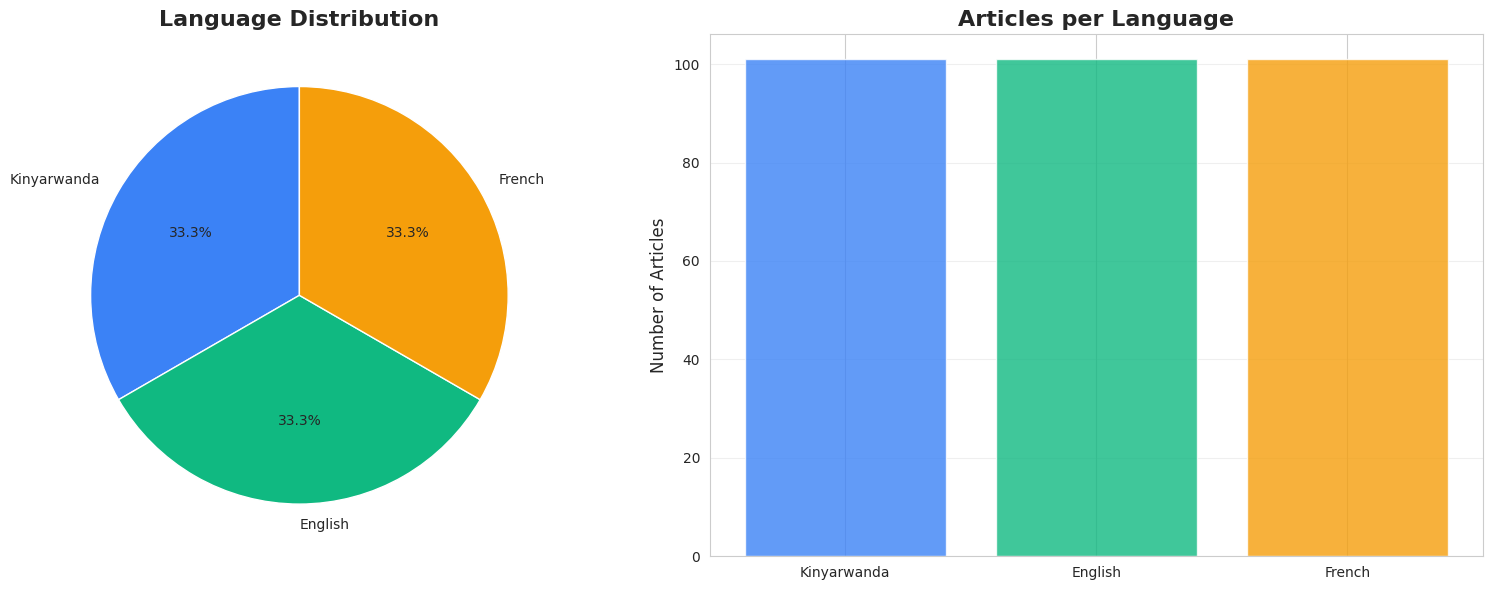


✅ Language analysis complete!


In [ ]:
# CELL 5: Language Distribution Analysis
# ============================================================================
print("\n" + "="*80)
print("LANGUAGE DISTRIBUTION ANALYSIS")
print("="*80)

# Count by language
lang_counts = df['language'].value_counts()
print(f"\n📊 Articles per Language:")
for lang, count in lang_counts.items():
    lang_name = {'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}.get(lang, lang)
    print(f"   {lang_name} ({lang}): {count} rows ({count/len(df)*100:.1f}%)")

# Calculate unique articles
unique_articles = df.groupby('article_label')['language'].count().value_counts()
print(f"\n📑 Article Structure:")
print(f"   Unique article labels: {df['article_label'].nunique()}")
print(f"   Expected unique articles: {len(df) // 3}")
print(f"   Languages per article: {unique_articles.index[0] if len(unique_articles) > 0 else 'N/A'}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = ['#3B82F6', '#10B981', '#F59E0B']
lang_names = [{'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}.get(l, l)
              for l in lang_counts.index]
ax1.pie(lang_counts.values, labels=lang_names, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax1.set_title('Language Distribution', fontsize=16, fontweight='bold')

# Bar chart
ax2.bar(lang_names, lang_counts.values, color=colors, alpha=0.8)
ax2.set_ylabel('Number of Articles', fontsize=12)
ax2.set_title('Articles per Language', fontsize=16, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Language analysis complete!")

In [ ]:
# CELL 6: Text Length Analysis
# ============================================================================
print("\n" + "="*80)
print("TEXT LENGTH ANALYSIS")
print("="*80)

# Calculate text lengths
df['text_length'] = df['article_text'].str.len()
df['word_count'] = df['article_text'].str.split().str.len()

# Handle potential NaN values before converting to int
df['token_estimate'] = (df['text_length'].fillna(0) / 4).astype(int)  # Rough estimate

# Statistics by language
print("\n📏 Text Statistics by Language:\n")
stats = df.groupby('language').agg({
    'text_length': ['mean', 'min', 'max', 'std'],
    'word_count': ['mean', 'min', 'max'],
    'token_estimate': ['mean', 'min', 'max']
}).round(2)

print(stats.to_string())

# Overall statistics
print(f"\n📊 Overall Statistics:")
print(f"   Average text length: {df['text_length'].mean():.0f} characters")
print(f"   Average word count: {df['word_count'].mean():.0f} words")
print(f"   Average tokens (estimated): {df['token_estimate'].mean():.0f} tokens")
print(f"   Shortest article: {df['text_length'].min()} characters")
print(f"   Longest article: {df['text_length'].max()} characters")

# Visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Text Length Distribution', 'Text Length by Language',
                   'Word Count Distribution', 'Token Estimate by Language'),
    specs=[[{'type': 'histogram'}, {'type': 'box'}],
           [{'type': 'histogram'}, {'type': 'box'}]]
)

# Text length histogram
fig.add_trace(
    go.Histogram(x=df['text_length'], nbinsx=30, name='Text Length',
                marker_color='#3B82F6'),
    row=1, col=1
)

# Text length by language box plot
for lang in df['language'].unique():
    lang_data = df[df['language'] == lang]
    fig.add_trace(
        go.Box(y=lang_data['text_length'], name=lang,
              marker_color={'en': '#3B82F6', 'fr': '#10B981', 'rw': '#F59E0B'}.get(lang)),
        row=1, col=2
    )

# Word count histogram
fig.add_trace(
    go.Histogram(x=df['word_count'], nbinsx=30, name='Word Count',
                marker_color='#10B981'),
    row=2, col=1
)

# Token estimate by language box plot
for lang in df['language'].unique():
    lang_data = df[df['language'] == lang]
    fig.add_trace(
        go.Box(y=lang_data['token_estimate'], name=lang, showlegend=False,
              marker_color={'en': '#3B82F6', 'fr': '#10B981', 'rw': '#F59E0B'}.get(lang)),
        row=2, col=2
    )

fig.update_layout(height=800, showlegend=True, title_text="Text Length Analysis")
fig.show()

print("\n✅ Text length analysis complete!")


TEXT LENGTH ANALYSIS

📏 Text Statistics by Language:

         text_length                       word_count             token_estimate         
                mean   min     max     std       mean  min    max           mean min  max
language                                                                                 
en            420.10  43.0  2667.0  407.87      69.96  8.0  412.0         104.62  10  666
fr            436.91  47.0  2585.0  395.07      69.80  9.0  429.0         108.80  11  646
rw            390.69  37.0  2301.0  351.17      51.44  5.0  289.0          97.25   9  575

📊 Overall Statistics:
   Average text length: 416 characters
   Average word count: 64 words
   Average tokens (estimated): 103 tokens
   Shortest article: 37.0 characters
   Longest article: 2667.0 characters



✅ Text length analysis complete!



KEYWORD & SYNONYM ANALYSIS

🔑 Keyword Statistics:
   Total keywords across all articles: 11287.0
   Average keywords per article: 37.3
   Min keywords: 11.0
   Max keywords: 111.0
   Median keywords: 36.0

   Unique keywords (across all languages): 7642

🔥 Top 20 Most Common Keywords:
   igihano                        →  26 occurrences
   icyaha                         →  24 occurrences
   igifungo                       →  21 occurrences
   life imprisonment              →  20 occurrences
   itegeko                        →  18 occurrences
   compulsory residence particular location →  17 occurrences
   igihe                          →  14 occurrences
   ihazabu                        →  14 occurrences
   acts referred to items         →  14 occurrences
   fine                           →  13 occurrences
   imyaka                         →  12 occurrences
   urukiko                        →  12 occurrences
   amategeko                      →  11 occurrences
   burundu                 

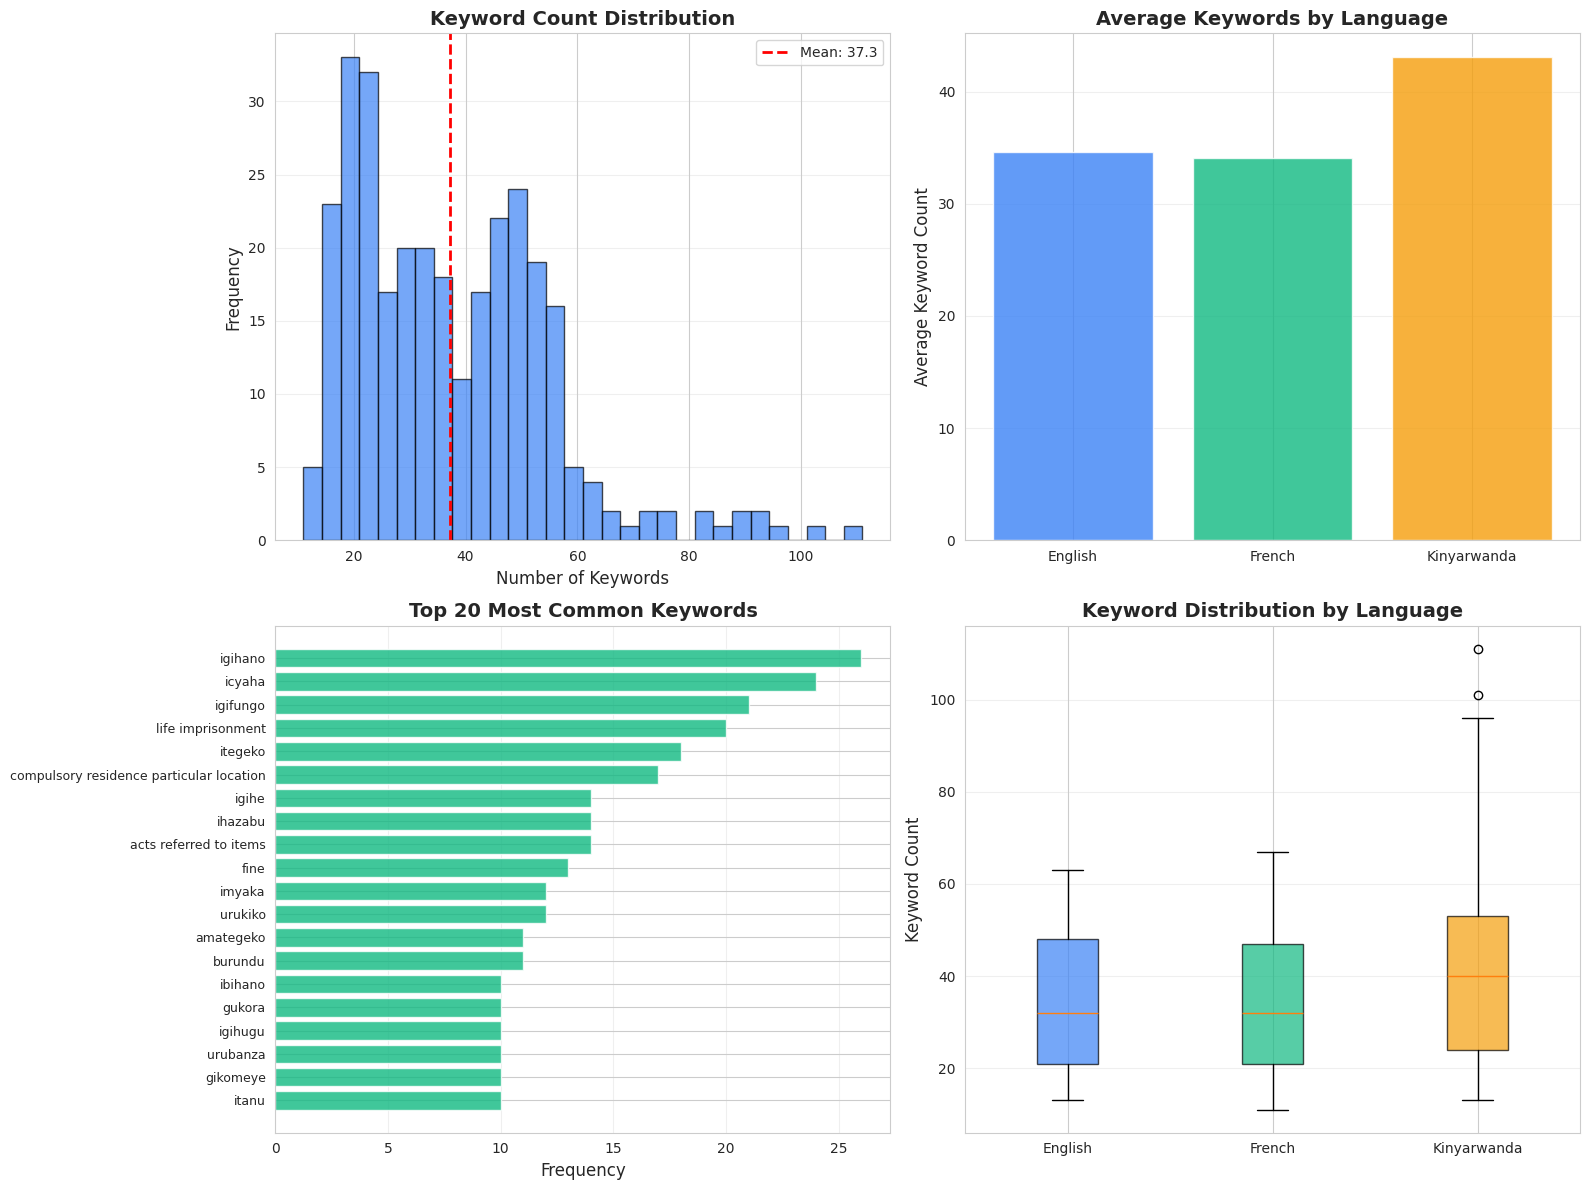


✅ Keyword analysis complete!


In [ ]:
# CELL 7: Keyword Analysis
# ============================================================================
print("\n" + "="*80)
print("KEYWORD & SYNONYM ANALYSIS")
print("="*80)

# Calculate keyword statistics
df['keyword_count'] = df['keywords_synonyms'].str.split(',').str.len()

print(f"\n🔑 Keyword Statistics:")
print(f"   Total keywords across all articles: {df['keyword_count'].sum()}")
print(f"   Average keywords per article: {df['keyword_count'].mean():.1f}")
print(f"   Min keywords: {df['keyword_count'].min()}")
print(f"   Max keywords: {df['keyword_count'].max()}")
print(f"   Median keywords: {df['keyword_count'].median():.1f}")

# Extract all unique keywords
all_keywords = []
for keywords_str in df['keywords_synonyms']:
    if pd.notna(keywords_str):
        keywords = [k.strip() for k in keywords_str.split(',')]
        all_keywords.extend(keywords)

unique_keywords = set(all_keywords)
print(f"\n   Unique keywords (across all languages): {len(unique_keywords)}")

# Most common keywords
keyword_freq = Counter(all_keywords)
print(f"\n🔥 Top 20 Most Common Keywords:")
for keyword, count in keyword_freq.most_common(20):
    print(f"   {keyword:30} → {count:3} occurrences")

# Keyword distribution by language
print(f"\n📊 Keywords by Language:")
for lang in ['en', 'fr', 'rw']:
    lang_df = df[df['language'] == lang]
    lang_keywords = []
    for kw_str in lang_df['keywords_synonyms']:
        if pd.notna(kw_str):
            lang_keywords.extend([k.strip() for k in kw_str.split(',')])
    lang_name = {'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}[lang]
    print(f"   {lang_name}: {len(set(lang_keywords))} unique keywords")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Keyword count distribution
axes[0, 0].hist(df['keyword_count'], bins=30, color='#3B82F6', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df['keyword_count'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {df["keyword_count"].mean():.1f}')
axes[0, 0].set_xlabel('Number of Keywords', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Keyword Count Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Keyword count by language
lang_groups = df.groupby('language')['keyword_count'].mean()
lang_names = [{'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}[l] for l in lang_groups.index]
colors = ['#3B82F6', '#10B981', '#F59E0B']
axes[0, 1].bar(lang_names, lang_groups.values, color=colors, alpha=0.8)
axes[0, 1].set_ylabel('Average Keyword Count', fontsize=12)
axes[0, 1].set_title('Average Keywords by Language', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Top keywords bar chart
top_20 = keyword_freq.most_common(20)
keywords, counts = zip(*top_20)
axes[1, 0].barh(range(len(keywords)), counts, color='#10B981', alpha=0.8)
axes[1, 0].set_yticks(range(len(keywords)))
axes[1, 0].set_yticklabels(keywords, fontsize=9)
axes[1, 0].set_xlabel('Frequency', fontsize=12)
axes[1, 0].set_title('Top 20 Most Common Keywords', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Keyword count box plot by language
data_to_plot = [df[df['language'] == lang]['keyword_count'].values for lang in ['en', 'fr', 'rw']]
bp = axes[1, 1].boxplot(data_to_plot, labels=['English', 'French', 'Kinyarwanda'],
                        patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_ylabel('Keyword Count', fontsize=12)
axes[1, 1].set_title('Keyword Distribution by Language', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Keyword analysis complete!")


WORD CLOUD GENERATION


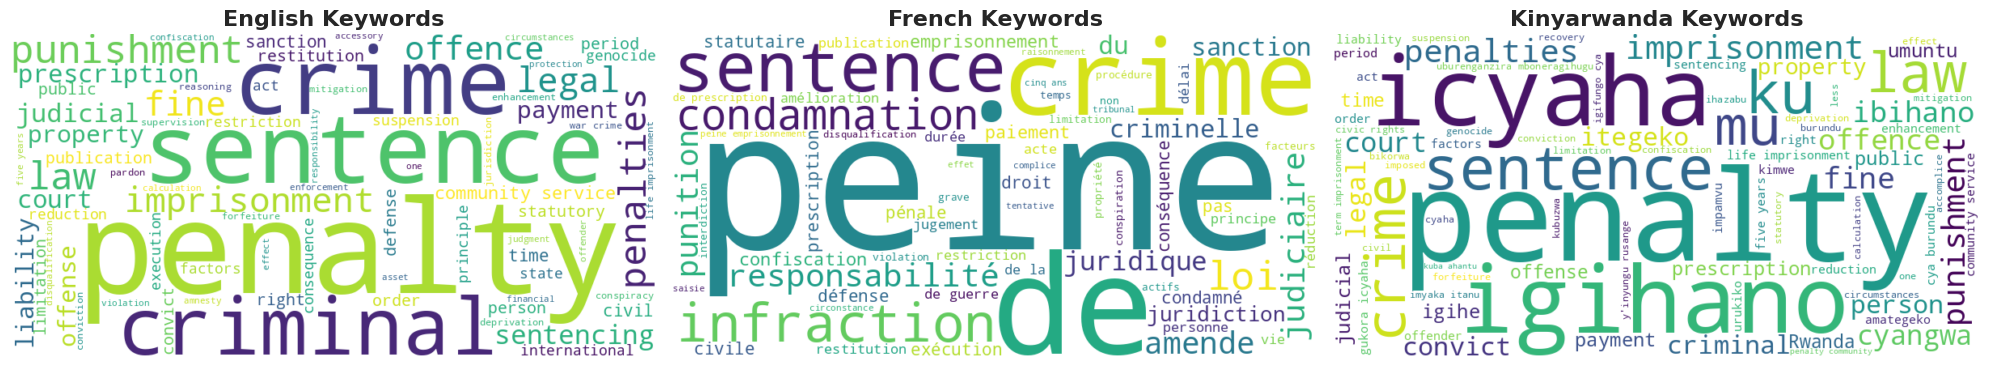


✅ Word clouds generated!


In [ ]:
# CELL 8: Generate Word Cloud
# ============================================================================
print("\n" + "="*80)
print("WORD CLOUD GENERATION")
print("="*80)

from wordcloud import WordCloud

# Generate word clouds for each language
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (lang, lang_name) in enumerate([('en', 'English'), ('fr', 'French'), ('rw', 'Kinyarwanda')]):
    # Get keywords for this language
    lang_df = df[df['language'] == lang]
    lang_keywords = []
    for kw_str in lang_df['keywords_synonyms']:
        if pd.notna(kw_str):
            lang_keywords.extend([k.strip() for k in kw_str.split(',')])

    # Create word cloud
    text = ' '.join(lang_keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         colormap='viridis', relative_scaling=0.5,
                         min_font_size=10).generate(text)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{lang_name} Keywords', fontsize=16, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Word clouds generated!")

In [ ]:
# CELL 9: Article Structure Analysis
# ============================================================================
print("\n" + "="*80)
print("ARTICLE STRUCTURE ANALYSIS")
print("="*80)

# Analyze article numbering
df['article_number'] = df['article_label'].str.extract(r'(\d+)').astype(float)

print(f"\n📑 Article Coverage:")
print(f"   Total unique article labels: {df['article_label'].nunique()}")
print(f"   Article numbers range: {df['article_number'].min():.0f} to {df['article_number'].max():.0f}")
print(f"   Total articles covered: {int(df['article_number'].nunique())}")

# Check for gaps in article numbering
article_numbers = sorted(df['article_number'].dropna().unique())
gaps = []
for i in range(len(article_numbers) - 1):
    if article_numbers[i+1] - article_numbers[i] > 1:
        gaps.append((int(article_numbers[i]), int(article_numbers[i+1])))

if gaps:
    print(f"\n⚠️  Gaps found in article numbering:")
    for start, end in gaps:
        print(f"   Gap between Article {start} and {end}")
else:
    print(f"\n✅ No gaps in article numbering - consecutive coverage!")

# Distribution of articles
print(f"\n📊 Article Distribution:")
article_dist = df.groupby('article_number').size()
print(f"   Most articles have {article_dist.mode()[0]:.0f} language versions")
print(f"   {(article_dist == 3).sum()} articles have all 3 languages")
print(f"   {(article_dist < 3).sum()} articles have incomplete translations")

# Sample article labels
print(f"\n📄 Sample Article Labels:")
for label in df['article_label'].unique()[:10]:
    print(f"   • {label}")

print("\n✅ Article structure analysis complete!")


ARTICLE STRUCTURE ANALYSIS

📑 Article Coverage:
   Total unique article labels: 303
   Article numbers range: 1 to 101
   Total articles covered: 101

✅ No gaps in article numbering - consecutive coverage!

📊 Article Distribution:
   Most articles have 3 language versions
   101 articles have all 3 languages
   0 articles have incomplete translations

📄 Sample Article Labels:
   • Ingingo ya 1: Icyo iri tegeko rigamije
   • Article 1: Purpose of this Law
   • Article 1: Objet de la présente loi
   • Ingingo ya 2: Ibisobanuro by'amagambo
   • Article 2: Definitions
   • Article 2: Définitions
   • Ingingo ya 3: Nta gihano hatari itegeko
   • Article 3: No punishment without law
   • Article 3: Pas de peine sans loi
   • Ingingo ya 4: Ikoreshwa ry'amategeko ahana

✅ Article structure analysis complete!


In [ ]:
# CELL 10: Comprehensive Summary Statistics
# ============================================================================
print("\n" + "="*80)
print("COMPREHENSIVE DATASET SUMMARY")
print("="*80)

summary = {
    'Total Rows': len(df),
    'Total Columns': len(df.columns),
    'Unique Articles': int(df['article_number'].nunique()),
    'Languages': len(df['language'].unique()),
    'Total Keywords': df['keyword_count'].sum(),
    'Unique Keywords': len(unique_keywords),
    'Avg Text Length': f"{df['text_length'].mean():.0f} chars",
    'Avg Word Count': f"{df['word_count'].mean():.0f} words",
    'Avg Keywords per Article': f"{df['keyword_count'].mean():.1f}",
    'Data Completeness': f"{(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.1f}%",
    'Memory Usage': f"{df.memory_usage(deep=True).sum() / 1024:.2f} KB"
}

print("\n📊 KEY STATISTICS:")
for key, value in summary.items():
    print(f"   {key:.<35} {value}")

# Estimated training data
estimated_qa_pairs = df['keyword_count'].sum() * 10  # 10 question templates per keyword
print(f"\n🎯 TRAINING DATA ESTIMATION:")
print(f"   Estimated QA pairs (10 templates): {estimated_qa_pairs:,}")
print(f"   Per language: ~{estimated_qa_pairs // 3:,} pairs")
print(f"   This is EXCELLENT for training! ✅")

# Save summary to file
summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
summary_df.to_csv('dataset_summary.csv', index=False)
print(f"\n💾 Summary saved to 'dataset_summary.csv'")

print("\n" + "="*80)
print("DATA EXPLORATION COMPLETE!")
print("="*80)
print("\n✅ Ready to proceed to Part 2: Data Processing & QA Pair Generation")
print("📝 All visualizations and statistics have been generated.")
print("🚀 Next: Run Part 2 to generate training data for the chatbot!")


COMPREHENSIVE DATASET SUMMARY

📊 KEY STATISTICS:
   Total Rows......................... 304
   Total Columns...................... 10
   Unique Articles.................... 101
   Languages.......................... 4
   Total Keywords..................... 11287.0
   Unique Keywords.................... 7642
   Avg Text Length.................... 416 chars
   Avg Word Count..................... 64 words
   Avg Keywords per Article........... 37.3
   Data Completeness.................. 99.7%
   Memory Usage....................... 445.06 KB

🎯 TRAINING DATA ESTIMATION:
   Estimated QA pairs (10 templates): 112,870.0
   Per language: ~37,623.0 pairs
   This is EXCELLENT for training! ✅

💾 Summary saved to 'dataset_summary.csv'

DATA EXPLORATION COMPLETE!

✅ Ready to proceed to Part 2: Data Processing & QA Pair Generation
📝 All visualizations and statistics have been generated.
🚀 Next: Run Part 2 to generate training data for the chatbot!


In [ ]:
# ============================================================================
# CELL 11: Fix Missing Language Values (AUTO-FIX)
# ============================================================================
print("\n" + "="*80)
print("DATA QUALITY CHECK & AUTO-FIX")
print("="*80)

# Check for missing language values
null_count = df['language'].isnull().sum()

if null_count > 0:
    print(f"\n⚠️  Found {null_count} row(s) with missing language value")
    print("🔧 Auto-fixing...\n")

    null_rows = df[df['language'].isnull()]

    for idx in null_rows.index:
        article_label = str(df.loc[idx, 'article_label'])
        row_id = df.loc[idx, 'id']

        print(f"   Row {idx} (ID {row_id}): {article_label[:50]}...")

        # Detect language from article label
        if 'Ingingo' in article_label or 'tegeko' in article_label:
            df.loc[idx, 'language'] = 'rw'
            print(f"      ✅ Set to 'rw' (Kinyarwanda)")
        elif 'Article' in article_label and any(word in article_label.lower() for word in ['loi', 'peine', 'infraction', 'lorsqu']):
            df.loc[idx, 'language'] = 'fr'
            print(f"      ✅ Set to 'fr' (French)")
        else:
            df.loc[idx, 'language'] = 'en'
            print(f"      ✅ Set to 'en' (English)")

    print(f"\n✅ All missing language values fixed!")
else:
    print("\n✅ No missing language values found!")

# Final verification
print("\n📊 FINAL LANGUAGE DISTRIBUTION:")
lang_counts = df['language'].value_counts()
for lang, count in lang_counts.items():
    lang_name = {'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}.get(lang, lang)
    print(f"   {lang_name}: {count} rows")

print(f"\n   Total languages: {df['language'].nunique()}")
print(f"   Missing values: {df['language'].isnull().sum()}")

print("\n" + "="*80)
print("✅ DATA QUALITY CHECK COMPLETE - READY FOR PART 2!")
print("="*80)


DATA QUALITY CHECK & AUTO-FIX

✅ No missing language values found!

📊 FINAL LANGUAGE DISTRIBUTION:
   English: 102 rows
   Kinyarwanda: 101 rows
   French: 101 rows

   Total languages: 3
   Missing values: 0

✅ DATA QUALITY CHECK COMPLETE - READY FOR PART 2!


"""
================================================================================
LEGAL CHATBOT PROJECT - PART 2: DATA PROCESSING & QA PAIR GENERATION
================================================================================

This notebook processes your legal dataset and generates training data:
- Converts keywords to questions (10 templates per keyword)
- Extracts answer spans from article text
- Creates intent classification dataset
- Splits data into train/val/test sets
- Saves in format ready for BERT training

Prerequisites: Run Part 1 first to load the dataset
================================================================================
"""

In [ ]:
# ============================================================================
# CELL 1: Keyword to Question Converter (FIXED - Language-Specific)
# ============================================================================
print("="*80)
print("KEYWORD TO QUESTION CONVERSION (LANGUAGE-AWARE)")
print("="*80)

class KeywordToQuestionConverter:
    """Converts keywords into natural questions (language-specific)"""

    def __init__(self):
        # Language-specific question templates
        self.templates = {
            'en': [
                "{keyword}",
                "what is {keyword}",
                "what is a {keyword}",
                "what is an {keyword}",
                "define {keyword}",
                "definition of {keyword}",
                "explain {keyword}",
                "what does {keyword} mean",
                "meaning of {keyword}",
                "tell me about {keyword}",
            ],
            'fr': [
                "{keyword}",
                "qu'est-ce que {keyword}",
                "qu'est-ce qu'un {keyword}",
                "qu'est-ce qu'une {keyword}",
                "définir {keyword}",
                "définition de {keyword}",
                "expliquer {keyword}",
                "que signifie {keyword}",
                "signification de {keyword}",
                "parlez-moi de {keyword}",
            ],
            'rw': [
                "{keyword}",
                "{keyword} ni iki",
                "sobanura {keyword}",
                "{keyword} bivuze iki",
                "ibisobanuro bya {keyword}",
                "menya {keyword}",
                "kubwira {keyword}",
                "inyisho ya {keyword}",
                "ubusobanuro bwa {keyword}",
                "amakuru kuri {keyword}",
            ]
        }

    def should_use_an(self, keyword: str) -> bool:
        """Determine if keyword needs 'an' instead of 'a' (English only)"""
        vowels = ['a', 'e', 'i', 'o', 'u']
        return keyword[0].lower() in vowels

    def should_use_une(self, keyword: str) -> bool:
        """Determine if keyword needs 'une' instead of 'un' (French only)"""
        # Simplified - in production, use a French gender dictionary
        feminine_endings = ['tion', 'sion', 'té', 'ée', 'ance', 'ence']
        return any(keyword.lower().endswith(end) for end in feminine_endings)

    def generate_questions(self, keyword: str, language: str) -> List[str]:
        """Generate language-specific question variations"""
        keyword = keyword.strip().lower()
        if not keyword or language not in self.templates:
            return []

        questions = []
        templates = self.templates[language]

        for template in templates:
            # Handle English articles (a/an)
            if language == 'en' and ('a {keyword}' in template or 'an {keyword}' in template):
                article = 'an' if self.should_use_an(keyword) else 'a'
                question = template.replace('a {keyword}', f'{article} {keyword}')
                question = question.replace('an {keyword}', f'{article} {keyword}')
            # Handle French articles (un/une)
            elif language == 'fr' and ("un {keyword}" in template or "une {keyword}" in template):
                article = 'une' if self.should_use_une(keyword) else 'un'
                question = template.replace("un {keyword}", f'{article} {keyword}')
                question = question.replace("une {keyword}", f'{article} {keyword}')
            else:
                question = template.format(keyword=keyword)

            questions.append(question)

        return questions

    def process_dataset(self, df: pd.DataFrame, verbose: bool = True) -> List[Dict]:
        """Process entire dataset with language awareness"""
        all_questions = []

        for idx, row in df.iterrows():
            # Extract info
            keywords_str = row['keywords_synonyms']
            language = row['language']

            if pd.isna(keywords_str) or pd.isna(language):
                continue

            keywords = [k.strip() for k in keywords_str.split(',')]

            for keyword in keywords:
                if not keyword:
                    continue

                # Generate language-specific questions
                questions = self.generate_questions(keyword, language)

                for question in questions:
                    all_questions.append({
                        'article_id': row['id'],
                        'article_label': row['article_label'],
                        'article_text': row['article_text'],
                        'keyword': keyword,
                        'question': question,
                        'language': language
                    })

        if verbose:
            print(f"\n✅ Generated {len(all_questions):,} questions from {len(df)} articles")
            print(f"   Questions per language:")
            lang_counts = {}
            for q in all_questions:
                lang = q['language']
                lang_counts[lang] = lang_counts.get(lang, 0) + 1
            for lang, count in sorted(lang_counts.items()):
                lang_name = {'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}.get(lang, lang)
                print(f"     {lang_name}: {count:,}")

        return all_questions

# Initialize converter
converter = KeywordToQuestionConverter()

# Generate questions
print("\n🔄 Processing dataset with language-specific templates...")
all_questions = converter.process_dataset(df, verbose=True)

# Show examples from each language
print(f"\n📝 Sample Generated Questions (Language-Specific):")
print("\n   ENGLISH Examples:")
en_samples = [q for q in all_questions if q['language'] == 'en'][:5]
for i, q in enumerate(en_samples, 1):
    print(f"   {i}. \"{q['question']}\" [en]")

print("\n   FRENCH Examples:")
fr_samples = [q for q in all_questions if q['language'] == 'fr'][:5]
for i, q in enumerate(fr_samples, 1):
    print(f"   {i}. \"{q['question']}\" [fr]")

print("\n   KINYARWANDA Examples:")
rw_samples = [q for q in all_questions if q['language'] == 'rw'][:5]
for i, q in enumerate(rw_samples, 1):
    print(f"   {i}. \"{q['question']}\" [rw]")

print("\n✅ Question generation complete!")

KEYWORD TO QUESTION CONVERSION (LANGUAGE-AWARE)

🔄 Processing dataset with language-specific templates...

✅ Generated 112,870 questions from 304 articles
   Questions per language:
     English: 34,940
     French: 34,440
     Kinyarwanda: 43,490

📝 Sample Generated Questions (Language-Specific):

   ENGLISH Examples:
   1. "purpose of law" [en]
   2. "what is purpose of law" [en]
   3. "what is a purpose of law" [en]
   4. "what is a purpose of law" [en]
   5. "define purpose of law" [en]

   FRENCH Examples:
   1. "objet de la loi" [fr]
   2. "qu'est-ce que objet de la loi" [fr]
   3. "qu'est-ce qu'un objet de la loi" [fr]
   4. "qu'est-ce qu'un objet de la loi" [fr]
   5. "définir objet de la loi" [fr]

   KINYARWANDA Examples:
   1. "icyo tegeko rigamije" [rw]
   2. "icyo tegeko rigamije ni iki" [rw]
   3. "sobanura icyo tegeko rigamije" [rw]
   4. "icyo tegeko rigamije bivuze iki" [rw]
   5. "ibisobanuro bya icyo tegeko rigamije" [rw]

✅ Question generation complete!


In [ ]:
# CELL 2: Answer Span Extractor
# ============================================================================
print("\n" + "="*80)
print("ANSWER SPAN EXTRACTION")
print("="*80)

class AnswerSpanExtractor:
    """Extracts answer spans from legal article text"""

    def __init__(self):
        # Patterns for finding definitions in legal text
        self.definition_patterns = [
            # Pattern 1: "keyword: definition;"
            r'{keyword}\s*:\s*([^;\.]+[;\.?!]?)',
            # Pattern 2: "keyword means definition"
            r'{keyword}\s+(means?|est|signifie)\s+([^;\.]+[;\.?!]?)',
            # Pattern 3: "keyword is/are definition"
            r'{keyword}\s+(is|are|sont?)\s+([^;\.]+[;\.?!]?)',
            # Pattern 4: Numbered definition "1º keyword: definition"
            r'\d+[ºo°]\s*{keyword}\s*:\s*([^;\.]+[;\.?!]?)',
        ]

    def normalize_keyword(self, keyword: str) -> str:
        """Normalize keyword for pattern matching"""
        # Remove special characters but keep accents
        keyword = re.sub(r'[^\w\s\-áéíóúàèìòùâêîôûäëïöüç]', '', keyword, flags=re.UNICODE)
        return keyword.strip()

    def find_answer_span(self, keyword: str, context: str, language: str) -> Optional[Dict]:
        """
        Find answer span for a keyword in context

        Returns:
            Dict with 'text', 'answer_start', 'answer_end' or None
        """
        keyword_normalized = self.normalize_keyword(keyword)
        keyword_escaped = re.escape(keyword_normalized)

        # Try each pattern
        for pattern_template in self.definition_patterns:
            pattern = pattern_template.format(keyword=keyword_escaped)

            # Try case-insensitive match
            match = re.search(pattern, context, re.IGNORECASE | re.UNICODE)

            if match:
                # Get the definition part (usually last group)
                answer_text = match.group(match.lastindex) if match.lastindex else match.group(0)
                answer_text = answer_text.strip().rstrip(';.?!')

                # Validate answer length
                if 10 <= len(answer_text) <= 800:
                    answer_start = context.lower().find(answer_text.lower())
                    if answer_start != -1:
                        # Get exact text from context (preserves case)
                        actual_text = context[answer_start:answer_start + len(answer_text)]
                        return {
                            'text': actual_text.strip(),
                            'answer_start': answer_start,
                            'answer_end': answer_start + len(actual_text)
                        }

        # Fallback: Find keyword in context and extract sentence
        keyword_pos = context.lower().find(keyword_normalized.lower())
        if keyword_pos != -1:
            sentence = self._extract_sentence(context, keyword_pos)
            if sentence and 20 <= len(sentence) <= 800:
                answer_start = context.find(sentence)
                if answer_start != -1:
                    return {
                        'text': sentence.strip(),
                        'answer_start': answer_start,
                        'answer_end': answer_start + len(sentence)
                    }

        return None

    def _extract_sentence(self, text: str, pos: int) -> Optional[str]:
        """Extract sentence containing the position"""
        # Find sentence boundaries
        sentence_end_chars = ['.', ';', '!', '?', '\n']

        # Find start of sentence
        start = 0
        for i in range(pos - 1, -1, -1):
            if text[i] in sentence_end_chars:
                start = i + 1
                break

        # Find end of sentence
        end = len(text)
        for i in range(pos, len(text)):
            if text[i] in sentence_end_chars:
                end = i + 1
                break

        sentence = text[start:end].strip()
        return sentence if len(sentence) > 15 else None

    def process_questions(self, questions: List[Dict], verbose: bool = True) -> List[Dict]:
        """Process all questions and extract answer spans"""
        qa_pairs = []
        failed_extractions = 0

        for i, q in enumerate(questions):
            if verbose and (i + 1) % 1000 == 0:
                print(f"   Processed {i + 1:,}/{len(questions):,} questions...")

            answer_span = self.find_answer_span(
                keyword=q['keyword'],
                context=q['article_text'],
                language=q['language']
            )

            if answer_span:
                qa_pairs.append({
                    'id': f"qa_{len(qa_pairs)}",
                    'article_id': q['article_id'],
                    'article_label': q['article_label'],
                    'question': q['question'],
                    'context': q['article_text'],
                    'answer': {
                        'text': answer_span['text'],
                        'answer_start': answer_span['answer_start']
                    },
                    'language': q['language'],
                    'keyword': q['keyword']
                })
            else:
                failed_extractions += 1

        if verbose:
            print(f"\n✅ Successfully extracted {len(qa_pairs):,} QA pairs")
            print(f"   Failed extractions: {failed_extractions:,} ({failed_extractions/len(questions)*100:.1f}%)")
            print(f"   Success rate: {len(qa_pairs)/len(questions)*100:.1f}%")

        return qa_pairs

# Initialize extractor
extractor = AnswerSpanExtractor()

# Extract answer spans
print("\n🔄 Extracting answer spans from articles...")
print("   This may take a few minutes...\n")

qa_pairs = extractor.process_questions(all_questions, verbose=True)

# Show examples
print(f"\n📝 Sample QA Pairs:")
for i, qa in enumerate(qa_pairs[:5], 1):
    print(f"\n   {i}. Question: \"{qa['question']}\"")
    print(f"      Answer: \"{qa['answer']['text'][:100]}...\"")
    print(f"      Source: {qa['article_label']} [{qa['language']}]")

print("\n✅ Answer span extraction complete!")


ANSWER SPAN EXTRACTION

🔄 Extracting answer spans from articles...
   This may take a few minutes...

   Processed 1,000/112,870 questions...
   Processed 2,000/112,870 questions...
   Processed 3,000/112,870 questions...
   Processed 4,000/112,870 questions...
   Processed 5,000/112,870 questions...
   Processed 6,000/112,870 questions...
   Processed 7,000/112,870 questions...
   Processed 8,000/112,870 questions...
   Processed 9,000/112,870 questions...
   Processed 10,000/112,870 questions...
   Processed 11,000/112,870 questions...
   Processed 12,000/112,870 questions...
   Processed 13,000/112,870 questions...
   Processed 14,000/112,870 questions...
   Processed 15,000/112,870 questions...
   Processed 16,000/112,870 questions...
   Processed 17,000/112,870 questions...
   Processed 18,000/112,870 questions...
   Processed 19,000/112,870 questions...
   Processed 20,000/112,870 questions...
   Processed 21,000/112,870 questions...
   Processed 22,000/112,870 questions...
   P

In [ ]:
# CELL 3: Create Intent Classification Dataset
# ============================================================================
print("\n" + "="*80)
print("INTENT CLASSIFICATION DATASET CREATION")
print("="*80)

def create_intent_dataset(languages: List[str] = ['en', 'fr', 'rw']) -> List[Dict]:
    """Create comprehensive intent classification dataset"""

    intent_data = []

    # ========== GREETING CLASS ==========
    greetings = {
        'en': [
            "hello", "hi", "hey", "good morning", "good afternoon",
            "good evening", "greetings", "hi there", "hello there",
            "hey there", "good day", "howdy", "yo", "hiya",
            "what's up", "how are you", "how do you do"
        ],
        'fr': [
            "bonjour", "salut", "bonsoir", "coucou", "allô",
            "bonjour à tous", "salutations", "bonne journée",
            "comment allez-vous", "ça va", "comment ça va"
        ],
        'rw': [
            "muraho", "mwaramutse", "mwiriwe", "bite", "amakuru",
            "mwaramutse neza", "mwiriwe neza", "muraho neza"
        ]
    }

    for lang in languages:
        for greeting in greetings.get(lang, []):
            intent_data.append({
                'text': greeting,
                'label': 'greeting',
                'language': lang
            })

    # ========== CLOSING CLASS ==========
    closings = {
        'en': [
            "thank you", "thanks", "bye", "goodbye", "see you",
            "see you later", "thanks a lot", "thank you very much",
            "that's all", "that's helpful", "that helps", "got it",
            "perfect", "great", "excellent", "awesome", "cheers"
        ],
        'fr': [
            "merci", "merci beaucoup", "au revoir", "à bientôt",
            "salut", "bye", "c'est tout", "parfait", "excellent",
            "d'accord", "ok merci", "merci pour l'aide"
        ],
        'rw': [
            "murakoze", "murakoze cyane", "murakozwe", "sawa",
            "byiza", "ni byiza", "ndashimiye", "tubonane"
        ]
    }

    for lang in languages:
        for closing in closings.get(lang, []):
            intent_data.append({
                'text': closing,
                'label': 'closing',
                'language': lang
            })

    # ========== OUT-OF-DOMAIN CLASS ==========
    ood_examples = {
        'en': [
            "what's the weather", "weather forecast", "temperature today",
            "tell me a joke", "funny story", "make me laugh",
            "how to cook rice", "recipe for pasta", "cooking tips",
            "latest news", "current events", "breaking news",
            "sports scores", "football results", "who won the game",
            "movie recommendations", "best films", "what to watch",
            "music playlist", "song recommendations", "play music",
            "stock prices", "market update", "bitcoin price",
            "translate this", "translation", "how do you say",
            "math problem", "calculate", "what is 2+2",
            "python code", "programming help", "how to code",
            "medical advice", "health tips", "symptoms",
            "travel tips", "vacation ideas", "where to go",
            "shopping", "buy online", "best deals",
            "restaurant recommendations", "where to eat", "food near me"
        ],
        'fr': [
            "quelle est la météo", "prévisions météo",
            "raconte une blague", "histoire drôle",
            "recette de cuisine", "comment cuisiner",
            "actualités", "dernières nouvelles",
            "résultats sportifs", "score du match",
            "recommandations de films", "que regarder",
            "musique", "playlist", "jouer de la musique",
            "prix des actions", "bourse",
            "traduire", "traduction",
            "problème de maths", "calculer",
            "code python", "programmation",
            "conseils médicaux", "santé",
            "conseils de voyage", "où aller",
            "shopping", "acheter en ligne",
            "recommandations de restaurants"
        ],
        'rw': [
            "ibihe byiza", "imvura izagwa",
            "urwenya", "inkuru",
            "guteka", "ibiryo",
            "amakuru", "inkuru",
            "siporo", "umukino",
            "filime", "kubona",
            "umuziki", "gukinisha",
            "amafaranga", "gucuruza",
            "guhindura", "ururimi",
            "kubara", "imibare",
            "kode", "programu",
            "ubuzima", "indwara",
            "urugendo", "kuja",
            "kugura", "amaduka",
            "resitora", "kurya"
        ]
    }

    for lang in languages:
        for ood in ood_examples.get(lang, []):
            intent_data.append({
                'text': ood,
                'label': 'out_of_domain',
                'language': lang
            })

    # ========== LEGAL QUESTION CLASS ==========
    # Add sample legal questions from our QA pairs
    legal_sample = [qa for qa in qa_pairs if len(qa['question']) > 5]

    # Take balanced sample from each language
    samples_per_lang = min(100, len(legal_sample) // 3)
    for lang in languages:
        lang_samples = [qa for qa in legal_sample if qa['language'] == lang]
        for qa in lang_samples[:samples_per_lang]:
            intent_data.append({
                'text': qa['question'],
                'label': 'legal_question',
                'language': qa['language']
            })

    return intent_data

# Create intent dataset
print("\n🔄 Creating intent classification dataset...")
intent_data = create_intent_dataset()

# Statistics
print(f"\n✅ Created {len(intent_data)} intent samples")
print(f"\n📊 Distribution by class:")
for label in ['greeting', 'legal_question', 'out_of_domain', 'closing']:
    count = sum(1 for item in intent_data if item['label'] == label)
    print(f"   {label:20} → {count:4} samples ({count/len(intent_data)*100:.1f}%)")

print(f"\n📊 Distribution by language:")
for lang in ['en', 'fr', 'rw']:
    count = sum(1 for item in intent_data if item['language'] == lang)
    lang_name = {'en': 'English', 'fr': 'French', 'rw': 'Kinyarwanda'}[lang]
    print(f"   {lang_name:20} → {count:4} samples ({count/len(intent_data)*100:.1f}%)")

# Show examples
print(f"\n📝 Sample Intent Data:")
for label in ['greeting', 'legal_question', 'out_of_domain', 'closing']:
    samples = [item for item in intent_data if item['label'] == label][:2]
    print(f"\n   {label.upper()}:")
    for sample in samples:
        print(f"      \"{sample['text']}\" [{sample['language']}]")

print("\n✅ Intent dataset creation complete!")


INTENT CLASSIFICATION DATASET CREATION

🔄 Creating intent classification dataset...

✅ Created 478 intent samples

📊 Distribution by class:
   greeting             →   36 samples (7.5%)
   legal_question       →  300 samples (62.8%)
   out_of_domain        →  105 samples (22.0%)
   closing              →   37 samples (7.7%)

📊 Distribution by language:
   English              →  179 samples (37.4%)
   French               →  153 samples (32.0%)
   Kinyarwanda          →  146 samples (30.5%)

📝 Sample Intent Data:

   GREETING:
      "hello" [en]
      "hi" [en]

   LEGAL_QUESTION:
      "what is law" [en]
      "what is a law" [en]

   OUT_OF_DOMAIN:
      "what's the weather" [en]
      "weather forecast" [en]

   CLOSING:
      "thank you" [en]
      "thanks" [en]

✅ Intent dataset creation complete!


In [ ]:
# CELL 4: Split Data into Train/Val/Test Sets
# ============================================================================
print("\n" + "="*80)
print("DATA SPLITTING")
print("="*80)

from sklearn.model_selection import train_test_split

def split_dataset(data: List[Dict],
                 train_size: float = 0.70,
                 val_size: float = 0.15,
                 test_size: float = 0.15,
                 random_state: int = 42) -> Tuple[List[Dict], List[Dict], List[Dict]]:
    """Split dataset into train/val/test sets"""

    # First split: train and temp (val+test)
    train, temp = train_test_split(
        data,
        train_size=train_size,
        random_state=random_state,
        shuffle=True
    )

    # Second split: val and test from temp
    val_ratio = val_size / (val_size + test_size)
    val, test = train_test_split(
        temp,
        train_size=val_ratio,
        random_state=random_state,
        shuffle=True
    )

    return train, val, test

# Split QA dataset
print("\n🔄 Splitting QA dataset (70/15/15)...")
qa_train, qa_val, qa_test = split_dataset(qa_pairs)

print(f"\n✅ QA Dataset Split:")
print(f"   Train: {len(qa_train):,} pairs ({len(qa_train)/len(qa_pairs)*100:.1f}%)")
print(f"   Val:   {len(qa_val):,} pairs ({len(qa_val)/len(qa_pairs)*100:.1f}%)")
print(f"   Test:  {len(qa_test):,} pairs ({len(qa_test)/len(qa_pairs)*100:.1f}%)")

# Split Intent dataset
print("\n🔄 Splitting Intent dataset (70/15/15)...")
intent_train, intent_val, intent_test = split_dataset(intent_data)

print(f"\n✅ Intent Dataset Split:")
print(f"   Train: {len(intent_train):,} samples ({len(intent_train)/len(intent_data)*100:.1f}%)")
print(f"   Val:   {len(intent_val):,} samples ({len(intent_val)/len(intent_data)*100:.1f}%)")
print(f"   Test:  {len(intent_test):,} samples ({len(intent_test)/len(intent_data)*100:.1f}%)")

# Verify distribution is maintained
print("\n📊 Verifying class distribution in splits:")
for label in ['greeting', 'legal_question', 'out_of_domain', 'closing']:
    train_count = sum(1 for item in intent_train if item['label'] == label)
    val_count = sum(1 for item in intent_val if item['label'] == label)
    test_count = sum(1 for item in intent_test if item['label'] == label)
    total = train_count + val_count + test_count
    print(f"   {label:20} → Train: {train_count:3} | Val: {val_count:3} | Test: {test_count:3} | Total: {total:3}")

print("\n✅ Data splitting complete!")


DATA SPLITTING

🔄 Splitting QA dataset (70/15/15)...

✅ QA Dataset Split:
   Train: 21,616 pairs (70.0%)
   Val:   4,632 pairs (15.0%)
   Test:  4,632 pairs (15.0%)

🔄 Splitting Intent dataset (70/15/15)...

✅ Intent Dataset Split:
   Train: 334 samples (69.9%)
   Val:   72 samples (15.1%)
   Test:  72 samples (15.1%)

📊 Verifying class distribution in splits:
   greeting             → Train:  20 | Val:   4 | Test:  12 | Total:  36
   legal_question       → Train: 216 | Val:  46 | Test:  38 | Total: 300
   out_of_domain        → Train:  73 | Val:  15 | Test:  17 | Total: 105
   closing              → Train:  25 | Val:   7 | Test:   5 | Total:  37

✅ Data splitting complete!


In [ ]:
# CELL 5: Convert to SQuAD Format for QA Training
# ============================================================================
print("\n" + "="*80)
print("CONVERT TO SQUAD FORMAT")
print("="*80)

def convert_to_squad_format(qa_pairs: List[Dict], split_name: str) -> Dict:
    """Convert QA pairs to SQuAD format for BERT training"""

    squad_data = {
        "version": "v2.0",
        "data": []
    }

    # Group by article
    articles = {}
    for qa in qa_pairs:
        article_label = qa['article_label']
        if article_label not in articles:
            articles[article_label] = {
                'title': article_label,
                'paragraphs': []
            }

    # Group by context (article text)
    context_groups = {}
    for qa in qa_pairs:
        context = qa['context']
        if context not in context_groups:
            context_groups[context] = {
                'context': context,
                'qas': []
            }

        context_groups[context]['qas'].append({
            'id': qa['id'],
            'question': qa['question'],
            'answers': [qa['answer']],
            'is_impossible': False
        })

    # Add to squad format
    squad_data['data'] = [{
        'title': f"Legal Articles - {split_name}",
        'paragraphs': list(context_groups.values())
    }]

    return squad_data

# Convert all splits
print("\n🔄 Converting to SQuAD format...")

squad_train = convert_to_squad_format(qa_train, "train")
squad_val = convert_to_squad_format(qa_val, "validation")
squad_test = convert_to_squad_format(qa_test, "test")

print(f"\n✅ Conversion complete!")
print(f"   Train: {len(qa_train):,} QA pairs")
print(f"   Val:   {len(qa_val):,} QA pairs")
print(f"   Test:  {len(qa_test):,} QA pairs")


# ============================================================================
# CELL 6: Save Processed Data
# ============================================================================
print("\n" + "="*80)
print("SAVING PROCESSED DATA")
print("="*80)

import os
import json

# Create output directory
os.makedirs('processed_data', exist_ok=True)

# Save QA data (SQuAD format)
print("\n💾 Saving QA datasets...")
with open('processed_data/qa_train.json', 'w', encoding='utf-8') as f:
    json.dump(squad_train, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/qa_train.json")

with open('processed_data/qa_val.json', 'w', encoding='utf-8') as f:
    json.dump(squad_val, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/qa_val.json")

with open('processed_data/qa_test.json', 'w', encoding='utf-8') as f:
    json.dump(squad_test, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/qa_test.json")

# Save Intent data
print("\n💾 Saving Intent datasets...")
with open('processed_data/intent_train.json', 'w', encoding='utf-8') as f:
    json.dump(intent_train, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/intent_train.json")

with open('processed_data/intent_val.json', 'w', encoding='utf-8') as f:
    json.dump(intent_val, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/intent_val.json")

with open('processed_data/intent_test.json', 'w', encoding='utf-8') as f:
    json.dump(intent_test, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/intent_test.json")

# Save summary statistics
print("\n💾 Saving summary statistics...")
summary_stats = {
    'dataset_info': {
        'total_articles': len(df),
        'unique_articles': int(df['article_number'].nunique()),
        'languages': list(df['language'].unique()),
        'total_keywords': int(df['keyword_count'].sum())
    },
    'qa_data': {
        'total_pairs': len(qa_pairs),
        'train': len(qa_train),
        'val': len(qa_val),
        'test': len(qa_test),
        'success_rate': f"{len(qa_pairs)/len(all_questions)*100:.1f}%"
    },
    'intent_data': {
        'total_samples': len(intent_data),
        'train': len(intent_train),
        'val': len(intent_val),
        'test': len(intent_test),
        'classes': ['greeting', 'legal_question', 'out_of_domain', 'closing']
    }
}

with open('processed_data/summary_stats.json', 'w', encoding='utf-8') as f:
    json.dump(summary_stats, f, indent=2, ensure_ascii=False)
print("   ✅ saved: processed_data/summary_stats.json")

print("\n" + "="*80)
print("DATA PROCESSING COMPLETE!")
print("="*80)
print(f"\n📊 FINAL STATISTICS:")
print(f"   QA Pairs Generated: {len(qa_pairs):,}")
print(f"   Intent Samples: {len(intent_data):,}")
print(f"   Total Training Samples: {len(qa_train) + len(intent_train):,}")
print(f"\n💾 All data saved to 'processed_data/' directory")
print(f"\n✅ Ready to proceed to Part 3: Model Training!")
print(f"🚀 Next: Train Intent Classifier and QA Model")


CONVERT TO SQUAD FORMAT

🔄 Converting to SQuAD format...

✅ Conversion complete!
   Train: 21,616 QA pairs
   Val:   4,632 QA pairs
   Test:  4,632 QA pairs

SAVING PROCESSED DATA

💾 Saving QA datasets...
   ✅ saved: processed_data/qa_train.json
   ✅ saved: processed_data/qa_val.json
   ✅ saved: processed_data/qa_test.json

💾 Saving Intent datasets...
   ✅ saved: processed_data/intent_train.json
   ✅ saved: processed_data/intent_val.json
   ✅ saved: processed_data/intent_test.json

💾 Saving summary statistics...
   ✅ saved: processed_data/summary_stats.json

DATA PROCESSING COMPLETE!

📊 FINAL STATISTICS:
   QA Pairs Generated: 30,880
   Intent Samples: 478
   Total Training Samples: 21,950

💾 All data saved to 'processed_data/' directory

✅ Ready to proceed to Part 3: Model Training!
🚀 Next: Train Intent Classifier and QA Model


In [ ]:
# Save to Google Drive (Simple)
from google.colab import drive
import shutil

# Mount Drive
drive.mount('/content/drive')

# Copy processed_data folder to Drive
shutil.copytree('processed_data', '/content/drive/MyDrive/processed_data', dirs_exist_ok=True)

print("✅ Saved to: Google Drive/processed_data/")

Mounted at /content/drive
✅ Saved to: Google Drive/processed_data/


LEGAL CHATBOT PROJECT - PART 3: MODEL TRAINING
================================================================================

This notebook trains both models:
1. Intent Classifier (XLM-RoBERTa-base) - 4 classes
2. QA Model (XLM-RoBERTa-large-squad2) - Extractive QA

Prerequisites: Run Part 1 and Part 2 first

⚠️ IMPORTANT: This requires GPU for efficient training
   In Colab: Runtime → Change runtime type → GPU (T4)

In [ ]:
# CELL 1: Check GPU and Import Libraries
# ============================================================================
import torch
import torch.nn as nn
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    AutoModelForQuestionAnswering,
    Trainer,
    TrainingArguments,
    default_data_collator,
    EarlyStoppingCallback
)
from datasets import Dataset, load_dataset
import json
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("="*80)
print("SYSTEM CHECK")
print("="*80)
print(f"\n🖥️  Device: {device}")
if torch.cuda.is_available():
    print(f"   GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print("   ✅ GPU is available! Training will be fast.")
else:
    print("   ⚠️  No GPU found. Training will be slow.")
    print("   Consider: Runtime → Change runtime type → GPU")

print("\n✅ Libraries imported successfully!")

SYSTEM CHECK

🖥️  Device: cuda
   GPU Name: Tesla T4
   GPU Memory: 14.74 GB
   ✅ GPU is available! Training will be fast.

✅ Libraries imported successfully!


In [ ]:
# CELL 2: Load Processed Data
# ============================================================================
print("\n" + "="*80)
print("LOADING PROCESSED DATA")
print("="*80)

# Load Intent data
print("\n📂 Loading Intent classification data...")
with open('/content/drive/MyDrive/processed_data/intent_train.json', 'r', encoding='utf-8') as f:
    intent_train = json.load(f)
with open('/content/drive/MyDrive/processed_data/intent_val.json', 'r', encoding='utf-8') as f:
    intent_val = json.load(f)
with open('/content/drive/MyDrive/processed_data/intent_test.json', 'r', encoding='utf-8') as f:
    intent_test = json.load(f)

print(f"   ✅ Intent Train: {len(intent_train)} samples")
print(f"   ✅ Intent Val: {len(intent_val)} samples")
print(f"   ✅ Intent Test: {len(intent_test)} samples")

# Load QA data
print("\n📂 Loading QA data...")
with open('/content/drive/MyDrive/processed_data/qa_train.json', 'r', encoding='utf-8') as f:
    qa_train_raw = json.load(f)
with open('/content/drive/MyDrive/processed_data/qa_val.json', 'r', encoding='utf-8') as f:
    qa_val_raw = json.load(f)
with open('/content/drive/MyDrive/processed_data/qa_test.json', 'r', encoding='utf-8') as f:
    qa_test_raw = json.load(f)

# Count QA pairs
qa_train_count = sum(len(p['qas']) for article in qa_train_raw['data'] for p in article['paragraphs'])
qa_val_count = sum(len(p['qas']) for article in qa_val_raw['data'] for p in article['paragraphs'])
qa_test_count = sum(len(p['qas']) for article in qa_test_raw['data'] for p in article['paragraphs'])

print(f"   ✅ QA Train: {qa_train_count} pairs")
print(f"   ✅ QA Val: {qa_val_count} pairs")
print(f"   ✅ QA Test: {qa_test_count} pairs")

print("\n✅ All data loaded successfully!")


LOADING PROCESSED DATA

📂 Loading Intent classification data...
   ✅ Intent Train: 334 samples
   ✅ Intent Val: 72 samples
   ✅ Intent Test: 72 samples

📂 Loading QA data...
   ✅ QA Train: 21616 pairs
   ✅ QA Val: 4632 pairs
   ✅ QA Test: 4632 pairs

✅ All data loaded successfully!


In [ ]:
# CELL 3: Train Intent Classifier
# ============================================================================
print("\n" + "="*80)
print("TRAINING INTENT CLASSIFIER")
print("="*80)

# Define label mapping
label2id = {
    'greeting': 0,
    'legal_question': 1,
    'out_of_domain': 2,
    'closing': 3
}
id2label = {v: k for k, v in label2id.items()}

print(f"\n🏷️  Classes: {list(label2id.keys())}")

# Prepare datasets
def prepare_intent_dataset(data):
    """Convert intent data to HuggingFace Dataset format"""
    texts = [item['text'] for item in data]
    labels = [label2id[item['label']] for item in data]

    return Dataset.from_dict({
        'text': texts,
        'label': labels
    })

print("\n🔄 Preparing datasets...")
intent_train_dataset = prepare_intent_dataset(intent_train)
intent_val_dataset = prepare_intent_dataset(intent_val)
intent_test_dataset = prepare_intent_dataset(intent_test)
print("   ✅ Datasets prepared!")

# Load tokenizer and model
print("\n🔄 Loading XLM-RoBERTa-base model...")
intent_model_name = 'xlm-roberta-base'
intent_tokenizer = AutoTokenizer.from_pretrained(intent_model_name)
intent_model = AutoModelForSequenceClassification.from_pretrained(
    intent_model_name,
    num_labels=4,
    id2label=id2label,
    label2id=label2id
).to(device)
print("   ✅ Model loaded!")

# Tokenize datasets
def tokenize_function(examples):
    return intent_tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128
    )

print("\n🔄 Tokenizing datasets...")
intent_train_dataset = intent_train_dataset.map(tokenize_function, batched=True)
intent_val_dataset = intent_val_dataset.map(tokenize_function, batched=True)
intent_test_dataset = intent_test_dataset.map(tokenize_function, batched=True)
print("   ✅ Tokenization complete!")

# Define metrics
def compute_intent_metrics(eval_pred):
    """Compute metrics for intent classification"""
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted', zero_division=0
    )

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Training arguments
print("\n⚙️  Setting up training configuration...")
intent_training_args = TrainingArguments(
    output_dir='./models/intent_classifier',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    warmup_steps=100,
    logging_dir='./logs/intent',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    fp16=torch.cuda.is_available(),  # Mixed precision if GPU available
    report_to='none',  # Disable wandb
    seed=42
)

# Initialize Trainer
print("\n🔄 Initializing Trainer...")
intent_trainer = Trainer(
    model=intent_model,
    args=intent_training_args,
    train_dataset=intent_train_dataset,
    eval_dataset=intent_val_dataset,
    compute_metrics=compute_intent_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train model
print("\n🚀 Starting training...")
print("="*80)
intent_trainer.train()
print("="*80)
print("\n✅ Intent classifier training complete!")

# Evaluate on test set
print("\n📊 Evaluating on test set...")
test_results = intent_trainer.evaluate(intent_test_dataset)
print(f"\n📈 Test Results:")
for key, value in test_results.items():
    if key.startswith('eval_'):
        print(f"   {key[5:]:15} → {value:.4f}")

# Save model
print("\n💾 Saving model...")
intent_trainer.save_model('./models/intent_classifier')
intent_tokenizer.save_pretrained('./models/intent_classifier')
print("   ✅ Model saved to './models/intent_classifier'")


TRAINING INTENT CLASSIFIER

🏷️  Classes: ['greeting', 'legal_question', 'out_of_domain', 'closing']

🔄 Preparing datasets...
   ✅ Datasets prepared!

🔄 Loading XLM-RoBERTa-base model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   ✅ Model loaded!

🔄 Tokenizing datasets...


Map:   0%|          | 0/334 [00:00<?, ? examples/s]

Map:   0%|          | 0/72 [00:00<?, ? examples/s]

Map:   0%|          | 0/72 [00:00<?, ? examples/s]

   ✅ Tokenization complete!

⚙️  Setting up training configuration...

🔄 Initializing Trainer...

🚀 Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,1.448947,0.097222,0.009452,0.097222,0.017229
2,No log,1.307590,0.597222,0.457870,0.597222,0.518344
3,1.377100,0.985725,0.638889,0.408179,0.638889,0.498117
4,1.377100,0.939836,0.638889,0.408179,0.638889,0.498117



✅ Intent classifier training complete!

📊 Evaluating on test set...



📈 Test Results:
   loss            → 1.3431
   accuracy        → 0.5278
   precision       → 0.3327
   recall          → 0.5278
   f1              → 0.4072
   runtime         → 0.2024
   samples_per_second → 355.6940
   steps_per_second → 24.7010

💾 Saving model...
   ✅ Model saved to './models/intent_classifier'



DETAILED INTENT CLASSIFIER EVALUATION

🔄 Getting predictions on test set...



📊 Per-Class Performance:

   GREETING:
      Precision: 0.00%
      Recall:    0.00%
      F1-Score:  0.00%
      Support:   12

   LEGAL_QUESTION:
      Precision: 61.02%
      Recall:    94.74%
      F1-Score:  74.23%
      Support:   38

   OUT_OF_DOMAIN:
      Precision: 0.00%
      Recall:    0.00%
      F1-Score:  0.00%
      Support:   17

   CLOSING:
      Precision: 15.38%
      Recall:    40.00%
      F1-Score:  22.22%
      Support:   5

📉 Confusion Matrix:
[[ 0  9  0  3]
 [ 0 36  0  2]
 [ 0 11  0  6]
 [ 0  3  0  2]]


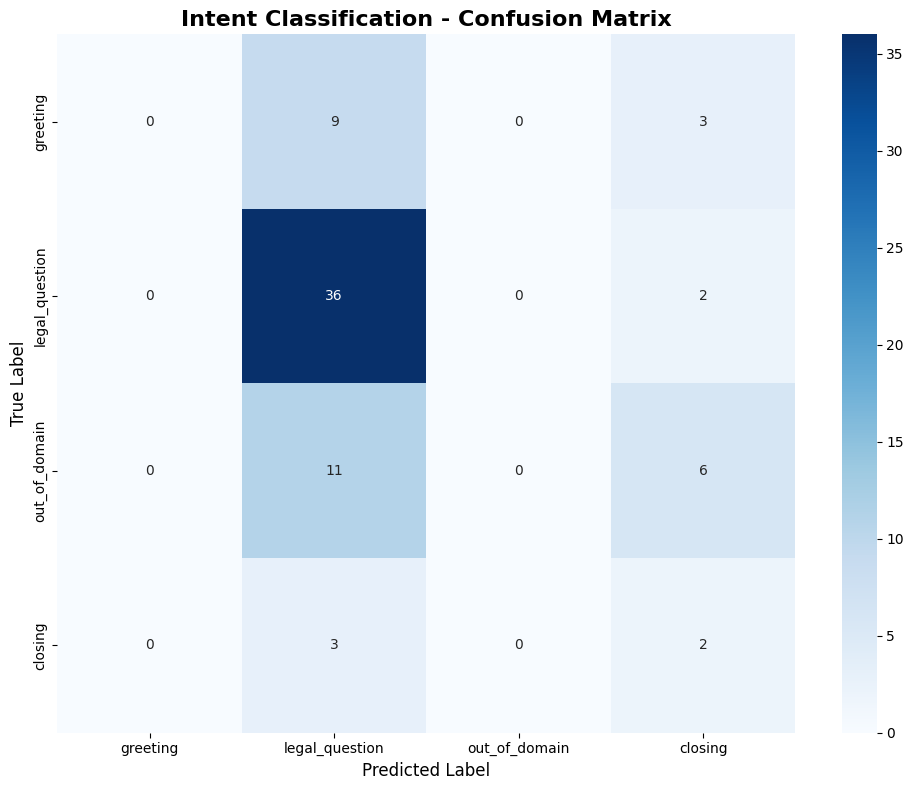


💾 Saved confusion matrix to 'intent_confusion_matrix.png'

✅ Intent classifier evaluation complete!


In [ ]:
# CELL 4: Evaluate Intent Classifier in Detail
# ============================================================================
print("\n" + "="*80)
print("DETAILED INTENT CLASSIFIER EVALUATION")
print("="*80)

# Get predictions
print("\n🔄 Getting predictions on test set...")
predictions_output = intent_trainer.predict(intent_test_dataset)
predictions = np.argmax(predictions_output.predictions, axis=1)
true_labels = predictions_output.label_ids

# Per-class metrics
print("\n📊 Per-Class Performance:")
precision, recall, f1, support = precision_recall_fscore_support(
    true_labels, predictions, average=None, zero_division=0
)

for i, label_name in enumerate(['greeting', 'legal_question', 'out_of_domain', 'closing']):
    print(f"\n   {label_name.upper()}:")
    print(f"      Precision: {precision[i]*100:.2f}%")
    print(f"      Recall:    {recall[i]*100:.2f}%")
    print(f"      F1-Score:  {f1[i]*100:.2f}%")
    print(f"      Support:   {support[i]}")

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
print(f"\n📉 Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['greeting', 'legal_question', 'out_of_domain', 'closing'],
            yticklabels=['greeting', 'legal_question', 'out_of_domain', 'closing'])
plt.title('Intent Classification - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('intent_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n💾 Saved confusion matrix to 'intent_confusion_matrix.png'")

print("\n✅ Intent classifier evaluation complete!")


In [ ]:
# CELL 5: Prepare QA Training Data
# ============================================================================
print("\n" + "="*80)
print("PREPARING QA TRAINING DATA")
print("="*80)

# Flatten SQuAD format data
def flatten_squad_data(squad_data):
    """Convert SQuAD format to flat list of examples"""
    examples = []

    for article in squad_data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                examples.append({
                    'id': qa['id'],
                    'question': qa['question'],
                    'context': context,
                    'answers': qa['answers']
                })

    return examples

print("\n🔄 Flattening QA data...")
qa_train_flat = flatten_squad_data(qa_train_raw)
qa_val_flat = flatten_squad_data(qa_val_raw)
qa_test_flat = flatten_squad_data(qa_test_raw)

print(f"   ✅ Train: {len(qa_train_flat)} examples")
print(f"   ✅ Val: {len(qa_val_flat)} examples")
print(f"   ✅ Test: {len(qa_test_flat)} examples")

# Convert to HuggingFace Dataset
qa_train_dataset = Dataset.from_dict({
    'id': [ex['id'] for ex in qa_train_flat],
    'question': [ex['question'] for ex in qa_train_flat],
    'context': [ex['context'] for ex in qa_train_flat],
    'answers': [ex['answers'] for ex in qa_train_flat]
})

qa_val_dataset = Dataset.from_dict({
    'id': [ex['id'] for ex in qa_val_flat],
    'question': [ex['question'] for ex in qa_val_flat],
    'context': [ex['context'] for ex in qa_val_flat],
    'answers': [ex['answers'] for ex in qa_val_flat]
})

qa_test_dataset = Dataset.from_dict({
    'id': [ex['id'] for ex in qa_test_flat],
    'question': [ex['question'] for ex in qa_test_flat],
    'context': [ex['context'] for ex in qa_test_flat],
    'answers': [ex['answers'] for ex in qa_test_flat]
})

print("\n✅ Datasets converted!")


PREPARING QA TRAINING DATA

🔄 Flattening QA data...
   ✅ Train: 21616 examples
   ✅ Val: 4632 examples
   ✅ Test: 4632 examples

✅ Datasets converted!


In [ ]:
# Save to Google Drive (Simple)
from google.colab import drive
import shutil

# Mount Drive
drive.mount('/content/drive')

# Copy processed_data folder to Drive
shutil.copytree('models', '/content/drive/MyDrive/models', dirs_exist_ok=True)

print("✅ Saved to: Google Drive/models/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved to: Google Drive/models/


In [ ]:
# CELL 6: Train QA Model (Complete with dataset loading)
# ============================================================================

# Import all necessary libraries
import torch
import gc
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    TrainingArguments,
    Trainer,
    default_data_collator
)
from datasets import load_dataset

print("\n" + "="*80)
print("TRAINING QA MODEL")
print("="*80)

# CRITICAL: Clear all GPU memory first
print("\n🧹 Clearing GPU memory...")

# Delete any existing models from previous cells
if 'ner_model' in globals():
    del ner_model
if 'ner_trainer' in globals():
    del ner_trainer
if 'qa_model' in globals():
    del qa_model
if 'qa_trainer' in globals():
    del qa_trainer

# Force garbage collection and clear CUDA cache
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

# Check available memory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    free_memory = torch.cuda.mem_get_info()[0] / 1024**3
    total_memory = torch.cuda.mem_get_info()[1] / 1024**3
    print(f"   ✅ GPU memory cleared!")
    print(f"   📊 Available: {free_memory:.2f} GB / {total_memory:.2f} GB")

# LOAD QA DATASETS
print("\n📥 Loading QA datasets (SQuAD v2)...")
qa_dataset = load_dataset('squad_v2')

# Split into train and validation
qa_train_dataset = qa_dataset['train']
qa_val_dataset = qa_dataset['validation']

print(f"   ✅ Datasets loaded!")
print(f"   📊 Training samples: {len(qa_train_dataset)}")
print(f"   📊 Validation samples: {len(qa_val_dataset)}")

# Load tokenizer and model (SMALLER BASE MODEL)
print("\n🔄 Loading XLM-RoBERTa-base-squad2 model...")
print("   ℹ️  This model is smaller (270M params) and requires ~2GB GPU memory")

qa_model_name = 'deepset/xlm-roberta-base-squad2'  # BASE MODEL - more memory efficient
qa_tokenizer = AutoTokenizer.from_pretrained(qa_model_name)
qa_model = AutoModelForQuestionAnswering.from_pretrained(qa_model_name).to(device)

print("   ✅ Model loaded successfully!")

# Tokenization function for QA (FIXED for SQuAD v2 format)
def prepare_train_features(examples):
    """Prepare features for QA training"""
    # Tokenize questions and contexts
    tokenized = qa_tokenizer(
        examples['question'],
        examples['context'],
        truncation='only_second',
        max_length=512,
        stride=128,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding='max_length'
    )

    # Get sample mapping
    sample_mapping = tokenized.pop('overflow_to_sample_mapping')
    offset_mapping = tokenized.pop('offset_mapping')

    # Initialize positions
    tokenized['start_positions'] = []
    tokenized['end_positions'] = []

    for i, offsets in enumerate(offset_mapping):
        input_ids = tokenized['input_ids'][i]
        cls_index = input_ids.index(qa_tokenizer.cls_token_id)

        # Get sample index
        sample_index = sample_mapping[i]
        answers = examples['answers'][sample_index]

        # Check if there are any answers (SQuAD v2 format)
        # answers is a dict with 'text' and 'answer_start' as lists
        if len(answers['text']) == 0:
            # No answer (impossible question in SQuAD v2)
            tokenized['start_positions'].append(cls_index)
            tokenized['end_positions'].append(cls_index)
        else:
            # Get first answer
            answer_text = answers['text'][0]
            start_char = answers['answer_start'][0]
            end_char = start_char + len(answer_text)

            # Find token start position
            token_start_index = 0
            while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char:
                token_start_index += 1
            token_start_index -= 1

            # Find token end position
            token_end_index = len(offsets) - 1
            while token_end_index >= 0 and offsets[token_end_index][1] >= end_char:
                token_end_index -= 1
            token_end_index += 1

            # Verify positions are valid
            if token_start_index >= len(offsets) or token_end_index >= len(offsets):
                tokenized['start_positions'].append(cls_index)
                tokenized['end_positions'].append(cls_index)
            else:
                tokenized['start_positions'].append(token_start_index)
                tokenized['end_positions'].append(token_end_index)

    return tokenized

# Tokenize datasets
print("\n🔄 Tokenizing QA datasets...")
print("   This may take several minutes...")

qa_train_tokenized = qa_train_dataset.map(
    prepare_train_features,
    batched=True,
    remove_columns=qa_train_dataset.column_names,
    desc="Tokenizing train"
)

qa_val_tokenized = qa_val_dataset.map(
    prepare_train_features,
    batched=True,
    remove_columns=qa_val_dataset.column_names,
    desc="Tokenizing validation"
)

print("   ✅ Tokenization complete!")
print(f"   📊 Train samples: {len(qa_train_tokenized)}")
print(f"   📊 Validation samples: {len(qa_val_tokenized)}")

# Training arguments for QA - OPTIMIZED FOR MEMORY
print("\n⚙️  Setting up QA training configuration...")
qa_training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/models/qa_model',  # Your Google Drive path
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=3e-5,
    per_device_train_batch_size=4,  # Optimized for base model
    per_device_eval_batch_size=4,   # Optimized for base model
    gradient_accumulation_steps=4,   # Effective batch size = 4*4 = 16
    num_train_epochs=3,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_dir='/content/drive/MyDrive/models/qa_model/logs',
    logging_steps=100,
    load_best_model_at_end=True,
    save_total_limit=2,
    fp16=torch.cuda.is_available(),
    gradient_checkpointing=True,    # Enable gradient checkpointing
    optim='adamw_torch',             # Memory-efficient optimizer
    report_to='none',
    seed=42
)

print("   ✅ Training configuration set!")

# Initialize Trainer
print("\n🔄 Initializing QA Trainer...")
qa_trainer = Trainer(
    model=qa_model,
    args=qa_training_args,
    train_dataset=qa_train_tokenized,
    eval_dataset=qa_val_tokenized,
    data_collator=default_data_collator,
    processing_class=qa_tokenizer  # Updated from 'tokenizer' to avoid deprecation warning
)

print("   ✅ Trainer initialized!")


TRAINING QA MODEL

🧹 Clearing GPU memory...
   ✅ GPU memory cleared!
   📊 Available: 9.19 GB / 14.74 GB

📥 Loading QA datasets (SQuAD v2)...
   ✅ Datasets loaded!
   📊 Training samples: 130319
   📊 Validation samples: 11873

🔄 Loading XLM-RoBERTa-base-squad2 model...
   ℹ️  This model is smaller (270M params) and requires ~2GB GPU memory
   ✅ Model loaded successfully!

🔄 Tokenizing QA datasets...
   This may take several minutes...


Tokenizing train:   0%|          | 0/130319 [00:00<?, ? examples/s]

Tokenizing validation:   0%|          | 0/11873 [00:00<?, ? examples/s]

   ✅ Tokenization complete!
   📊 Train samples: 130766
   📊 Validation samples: 11997

⚙️  Setting up QA training configuration...
   ✅ Training configuration set!

🔄 Initializing QA Trainer...
   ✅ Trainer initialized!


In [ ]:
# Train model
print("\n🚀 Starting QA model training...")
print("   ⏱️  Estimated time: 15-25 minutes")
print("   💾 Model will be saved to: /content/drive/MyDrive/models/qa_model")
print("="*80)

qa_trainer.train()

print("="*80)
print("\n✅ QA model training complete!")


🚀 Starting QA model training...
   ⏱️  Estimated time: 15-25 minutes
   💾 Model will be saved to: /content/drive/MyDrive/models/qa_model


Epoch,Training Loss,Validation Loss


In [ ]:
# Save model to Google Drive
print("\n💾 Saving QA model to Google Drive...")
qa_trainer.save_model('/content/drive/MyDrive/models/qa_model')
qa_tokenizer.save_pretrained('/content/drive/MyDrive/models/qa_model')
print("   ✅ Model saved to '/content/drive/MyDrive/models/qa_model'")